<a href="https://colab.research.google.com/github/BhuvaneshwariRamesh2003/CV_PRACTICAL/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving download (1).jpeg to download (1).jpeg


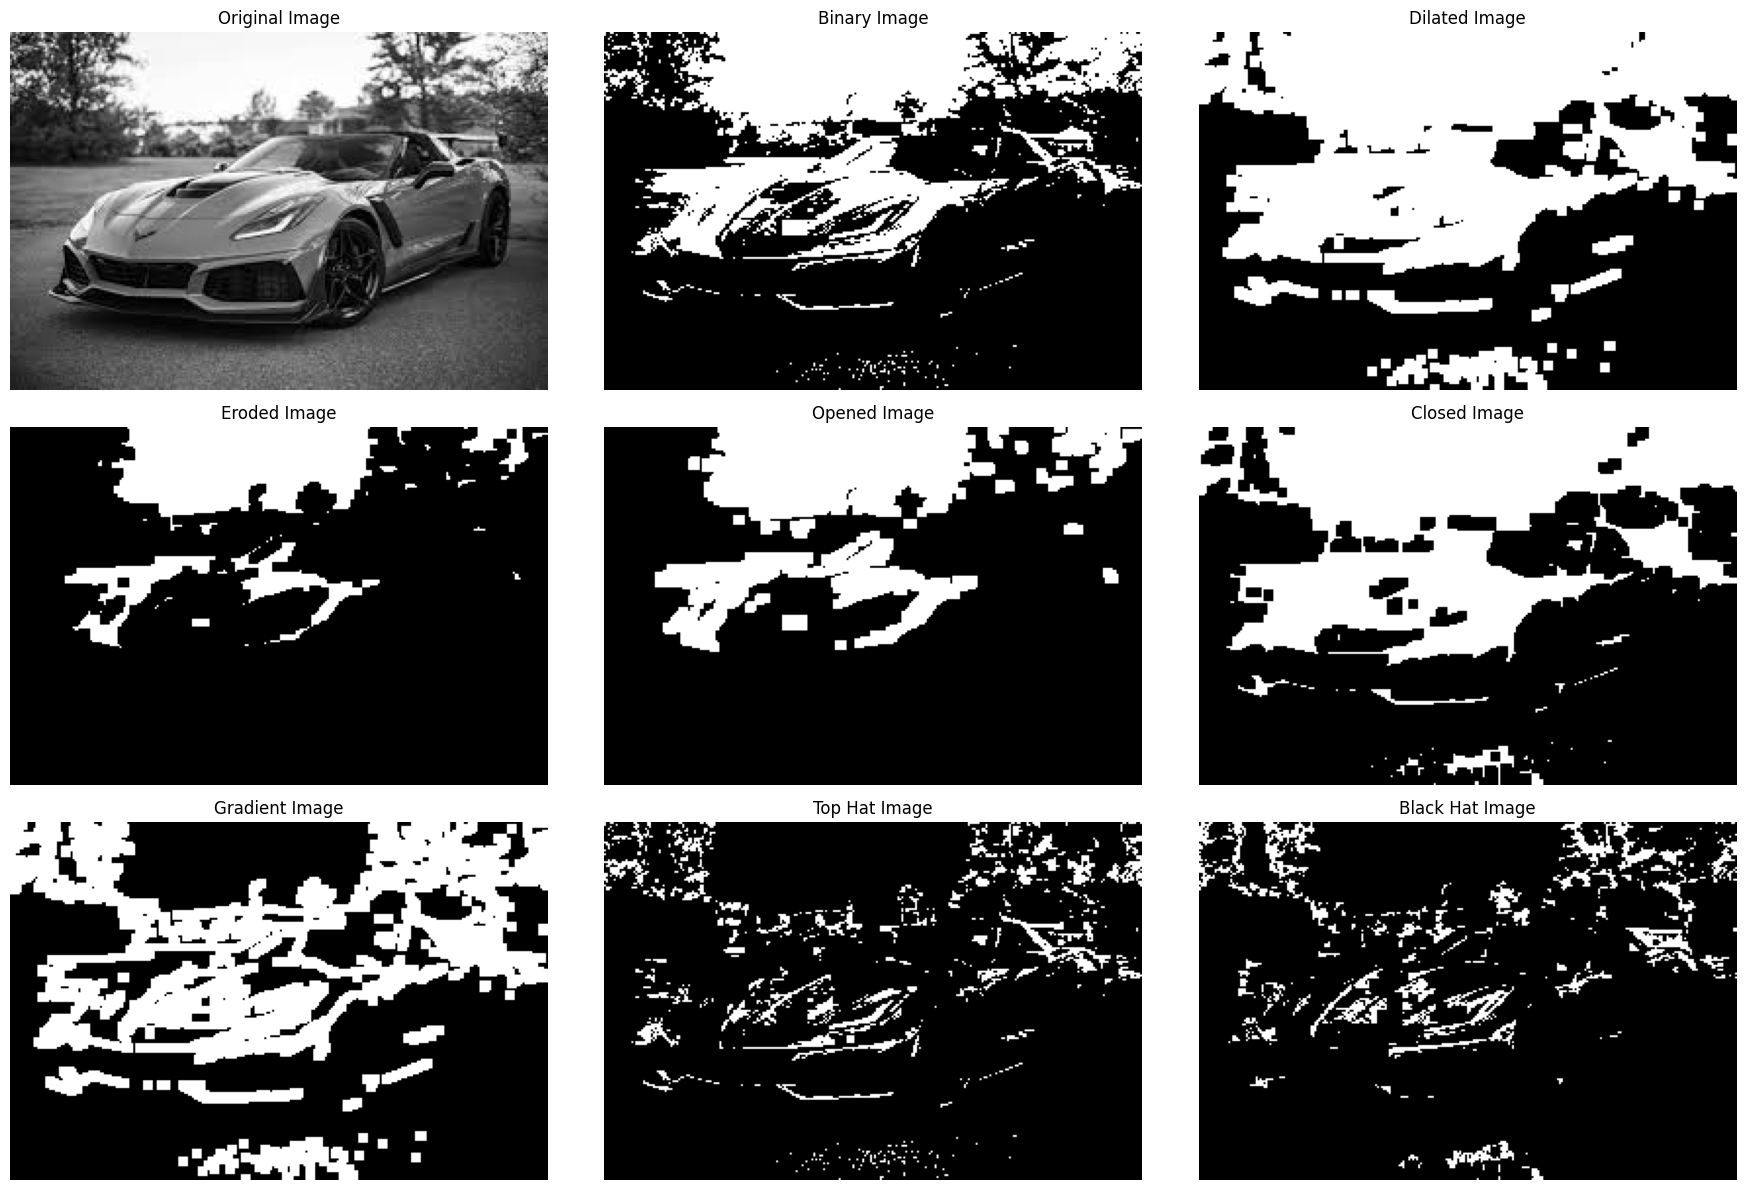

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

# Upload the image
uploaded = files.upload()

# Get the file name
file_name = list(uploaded.keys())[0]

# Load the image in grayscale
image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load image.")
    exit()

# Apply a binary threshold to the image
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Define a kernel for the morphological operations
kernel = np.ones((5, 5), np.uint8)

# Apply morphological operations
dilated = cv2.dilate(binary_image, kernel, iterations=1)
eroded = cv2.erode(binary_image, kernel, iterations=1)
opened = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
closed = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(binary_image, cv2.MORPH_GRADIENT, kernel)
tophat = cv2.morphologyEx(binary_image, cv2.MORPH_TOPHAT, kernel)
blackhat = cv2.morphologyEx(binary_image, cv2.MORPH_BLACKHAT, kernel)

# Plot the results
plt.figure(figsize=(18, 12))

plt.subplot(3, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.title('Binary Image')
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.title('Dilated Image')
plt.imshow(dilated, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.title('Eroded Image')
plt.imshow(eroded, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.title('Opened Image')
plt.imshow(opened, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 6)
plt.title('Closed Image')
plt.imshow(closed, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.title('Gradient Image')
plt.imshow(gradient, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.title('Top Hat Image')
plt.imshow(tophat, cmap='gray')
plt.axis('off')

plt.subplot(3, 3, 9)
plt.title('Black Hat Image')
plt.imshow(blackhat, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Saving tower .jpg to tower  (1).jpg


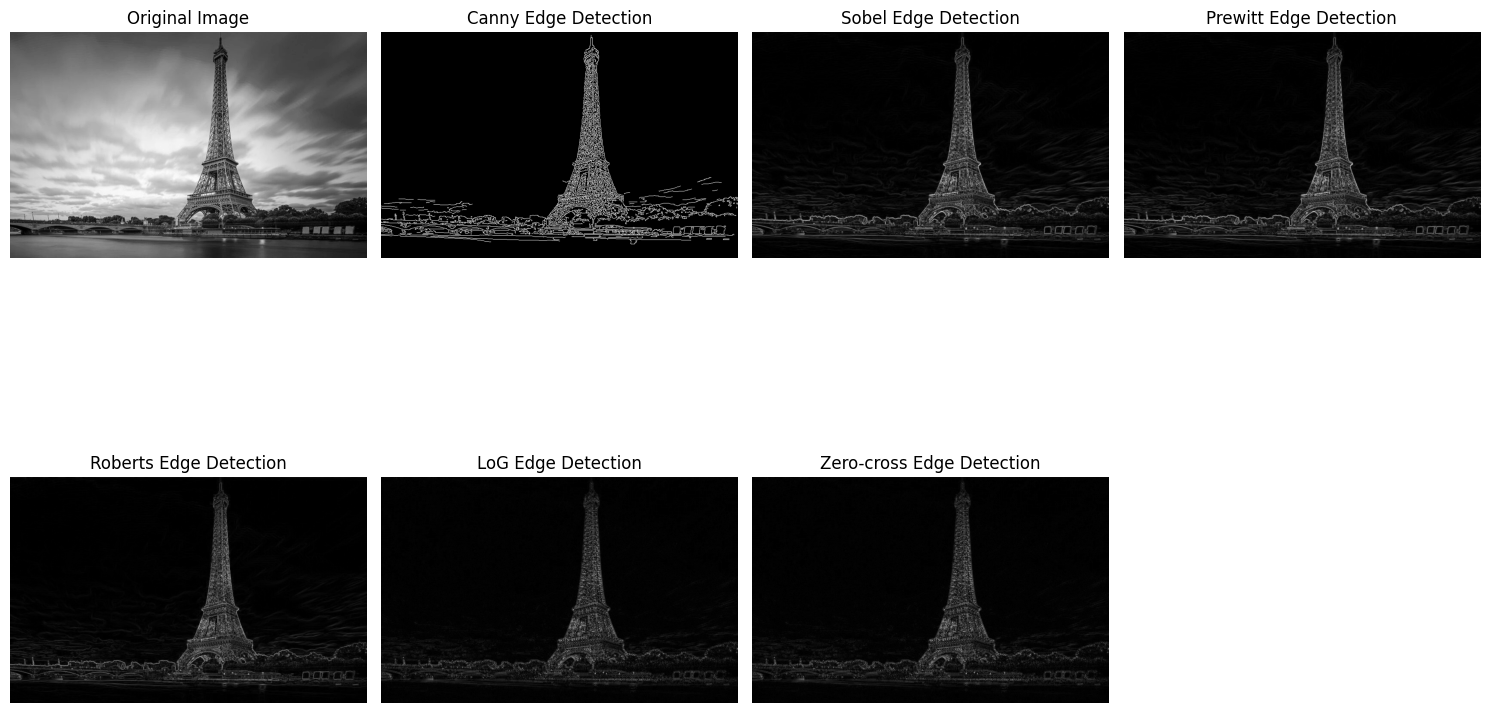

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

# Upload the image
uploaded = files.upload()

# Get the file name
file_name = list(uploaded.keys())[0]

# Load the image in grayscale
image = cv2.imread(file_name, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print("Error: Could not load image.")
    exit()

# Apply Canny edge detection
edges_canny = cv2.Canny(image, 100, 200)

# Apply Sobel edge detection
sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
edges_sobel = np.sqrt(sobelx**2 + sobely**2)
edges_sobel = np.uint8(edges_sobel / np.max(edges_sobel) * 255)

# Apply Prewitt edge detection
kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=int)
kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)
edges_prewittx = cv2.filter2D(image, cv2.CV_64F, kernelx)
edges_prewitty = cv2.filter2D(image, cv2.CV_64F, kernely)
edges_prewitt = np.sqrt(edges_prewittx**2 + edges_prewitty**2)
edges_prewitt = np.uint8(edges_prewitt / np.max(edges_prewitt) * 255)

# Apply Roberts edge detection
kernelx = np.array([[1, 0], [0, -1]], dtype=int)
kernely = np.array([[0, 1], [-1, 0]], dtype=int)
edges_robertsx = cv2.filter2D(image, cv2.CV_64F, kernelx)
edges_robertsy = cv2.filter2D(image, cv2.CV_64F, kernely)
edges_roberts = np.sqrt(edges_robertsx**2 + edges_robertsy**2)
edges_roberts = np.uint8(edges_roberts / np.max(edges_roberts) * 255)

# Apply Laplacian of Gaussian (LoG) edge detection
blurred = cv2.GaussianBlur(image, (3, 3), 0)
edges_log = cv2.Laplacian(blurred, cv2.CV_64F)
edges_log = np.uint8(np.absolute(edges_log) / np.max(np.absolute(edges_log)) * 255)

# Apply Zero-cross edge detection (approximated with Laplacian of Gaussian)
edges_zerocross = cv2.Laplacian(blurred, cv2.CV_64F)
edges_zerocross = np.uint8(np.absolute(edges_zerocross) / np.max(np.absolute(edges_zerocross)) * 255)

# Plot the results
plt.figure(figsize=(15, 10))

plt.subplot(2, 4, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.title('Canny Edge Detection')
plt.imshow(edges_canny, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.title('Sobel Edge Detection')
plt.imshow(edges_sobel, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.title('Prewitt Edge Detection')
plt.imshow(edges_prewitt, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.title('Roberts Edge Detection')
plt.imshow(edges_roberts, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.title('LoG Edge Detection')
plt.imshow(edges_log, cmap='gray')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.title('Zero-cross Edge Detection')
plt.imshow(edges_zerocross, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Please upload the image file:


Saving teddy.jpg to teddy.jpg
Loaded image type: <class 'numpy.ndarray'>, shape: (1200, 1920)


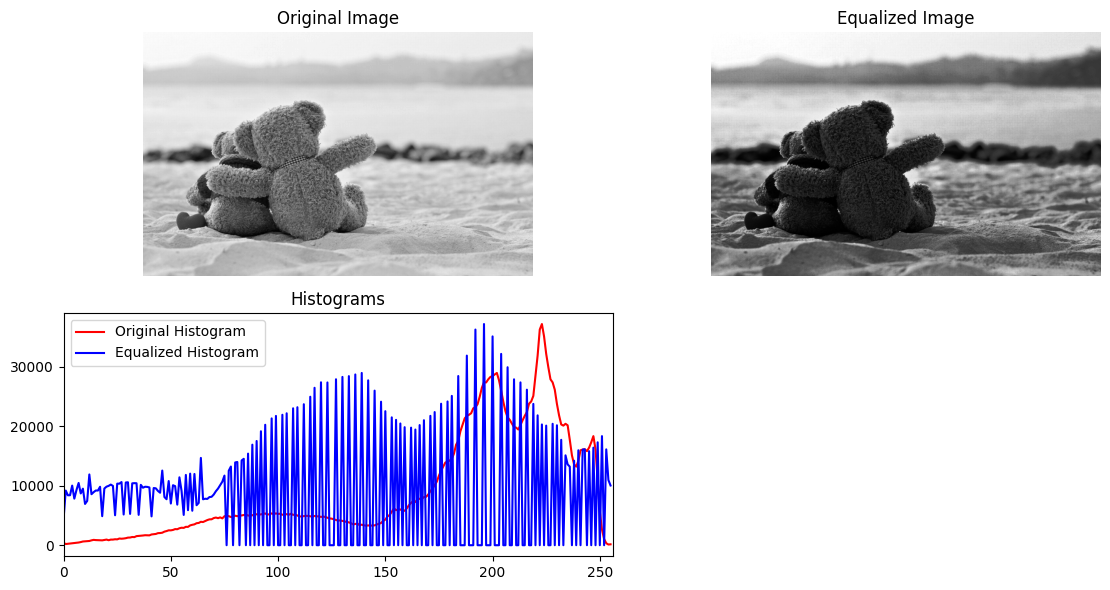

In [ ]:
# Histogram equalization
# Step 1: Import necessary libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

# Step 2: Upload the image file
print("Please upload the image file:")
uploaded = files.upload()

# Extract the filename from the uploaded file
for filename in uploaded.keys():
    image_path = filename

# Step 3: Load the image in grayscale
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image at path {image_path}.")
else:
    # Print the type and shape of the loaded image
    print(f"Loaded image type: {type(image)}, shape: {image.shape}")

    # Step 4: Apply histogram equalization
    equalized_image = cv2.equalizeHist(image)

    # Step 5: Calculate histograms
    original_hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    equalized_hist = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

    # Step 6: Plot the images and their histograms
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    plt.title('Original Image')
    plt.imshow(image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.title('Equalized Image')
    plt.imshow(equalized_image, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.title('Histograms')
    plt.plot(original_hist, color='red', label='Original Histogram')
    plt.plot(equalized_hist, color='blue', label='Equalized Histogram')
    plt.xlim([0, 256])
    plt.legend()

    plt.tight_layout()
    plt.show()

Saving house.jpg to house (2).jpg


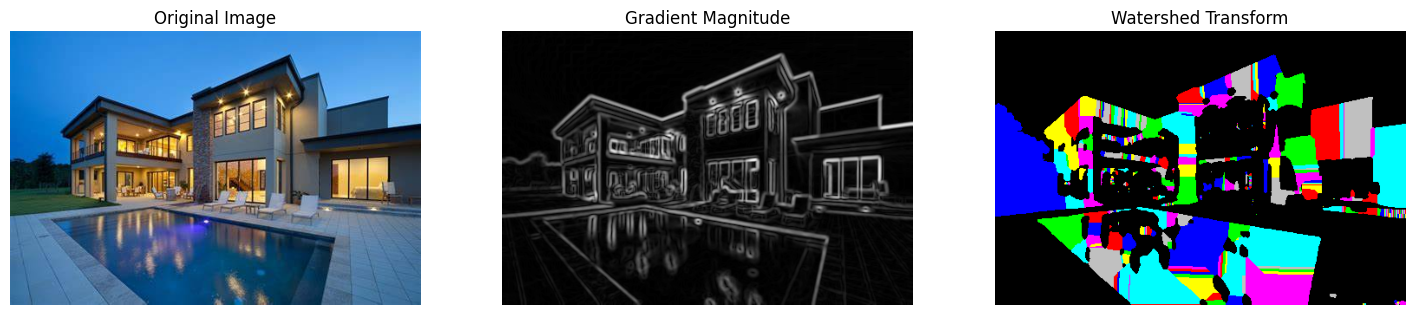

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
from scipy.ndimage import distance_transform_edt
from skimage import color, segmentation, filters, morphology
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload the image to Google Colab
uploaded = files.upload()

# Step 2: Load the uploaded image
image_path = list(uploaded.keys())[0]
I = cv2.imread(image_path)
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)

# Step 3: Convert to Grayscale (if necessary)
if len(I.shape) == 3:
    I_gray = cv2.cvtColor(I, cv2.COLOR_RGB2GRAY)

# Step 4: Noise Reduction
I_filtered = cv2.GaussianBlur(I_gray, (5, 5), 2)

# Step 5: Compute the Gradient Magnitude
Ix = filters.sobel_h(I_filtered)
Iy = filters.sobel_v(I_filtered)
gradmag = np.sqrt(Ix**2 + Iy**2)

# Step 6: Marker-Based Segmentation
# Compute the distance transform
ret, binary_image = cv2.threshold(I_filtered, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
D = distance_transform_edt(binary_image)

# Identify regional maxima and create markers
local_maxi = morphology.local_maxima(D)
markers = np.zeros_like(I_filtered, dtype=int)
markers[local_maxi] = np.arange(1, np.sum(local_maxi) + 1)

# Step 7: Apply the Watershed Transform
markers = segmentation.watershed(-D, markers, mask=binary_image)

# Define 7 distinct colors for visualization
colors = [
    [255, 0, 0],    # Red
    [0, 255, 0],    # Green
    [0, 0, 255],    # Blue
    [255, 255, 0],  # Yellow
    [0, 255, 255],  # Cyan
    [255, 0, 255],  # Magenta
    [192, 192, 192] # Gray
]

# Map each label to one of the 7 colors
Lrgb = np.zeros((*markers.shape, 3), dtype=np.uint8)
unique_labels = np.unique(markers)

for k, label in enumerate(unique_labels):
    if label == 0:
        continue  # Skip the background
    mask = markers == label
    color_idx = k % 7
    for c in range(3):
        Lrgb[:, :, c] += (mask * colors[color_idx][c]).astype(np.uint8)

# Step 8: Visualize the Results
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

axes[0].imshow(I)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(gradmag, cmap='gray')
axes[1].set_title('Gradient Magnitude')
axes[1].axis('off')

axes[2].imshow(Lrgb)
axes[2].set_title('Watershed Transform')
axes[2].axis('off')

plt.show()


Saving download (1).png to download (1).png


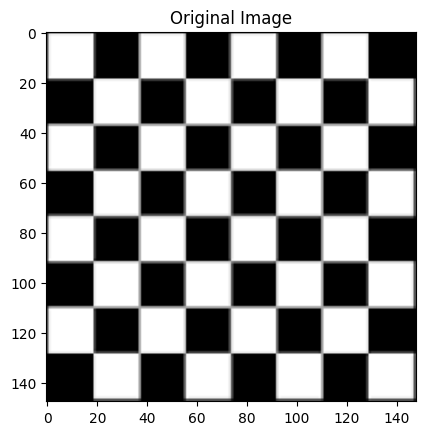

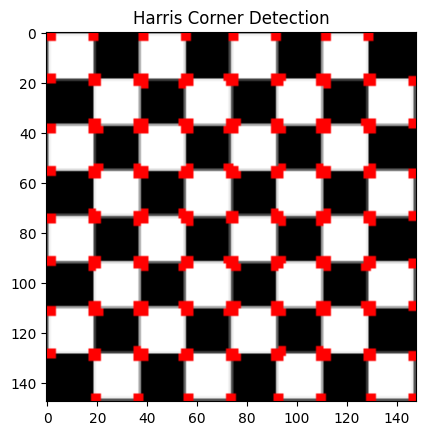

In [ ]:
import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Upload the image
uploaded = files.upload()

# Assuming the uploaded file is the image you want to process
filename = list(uploaded.keys())[0]

# Read the image
img = cv2.imread(filename)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

# Display the original image
plt.imshow(img_rgb)
plt.title('Original Image')
plt.show()

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert to float32
gray = np.float32(gray)

# Apply the Harris corner detector
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# Result is dilated for marking the corners, not important
dst = cv2.dilate(dst, None)

# Threshold for an optimal value, it may vary depending on the image
img[dst > 0.01 * dst.max()] = [0, 0, 255]

# Convert the result to RGB for displaying
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the Harris Corner Detection result
plt.imshow(img_rgb)
plt.title('Harris Corner Detection')
plt.show()


Upload the first image:


Saving book1.png to book1.png
User uploaded file "book1.png"
Upload the second image:


Saving book2.png to book2.png
User uploaded file "book2.png"


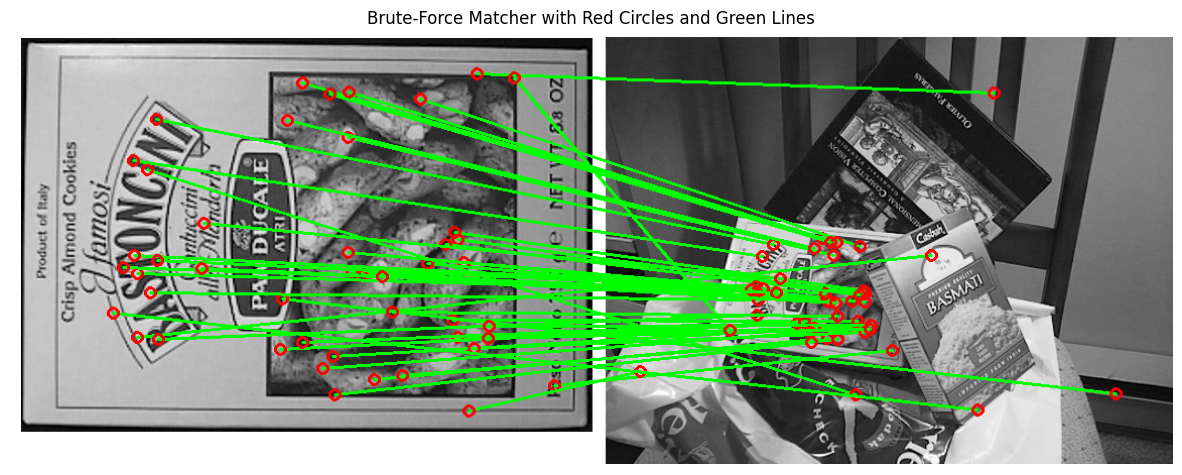

In [ ]:
# Install required libraries
!pip install opencv-python-headless matplotlib

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Function to upload an image from local drive
def upload_image(title):
    uploaded = files.upload()
    for filename in uploaded.keys():
        print(f'User uploaded file "{filename}"')
        return cv.imread(filename)

# Load the images
print("Upload the first image:")
img1 = upload_image("Select first image")
if img1 is None:
    print("Could not open or find the first image.")
    exit()

print("Upload the second image:")
img2 = upload_image("Select second image")
if img2 is None:
    print("Could not open or find the second image.")
    exit()

# Convert images to grayscale
gray1 = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

# Create SIFT detector object
sift = cv.SIFT_create()

# Detect keypoints and compute descriptors
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)

# Create Brute-Force Matcher
bf = cv.BFMatcher(cv.NORM_L2, crossCheck=True)

# Match descriptors
matches = bf.match(descriptors1, descriptors2)
matches = sorted(matches, key=lambda x: x.distance)

# Draw matches with red circles and green lines
def draw_matches_red_circles_green_lines(img1, kp1, img2, kp2, matches, num_matches=50):
    # Create an output image that stacks both input images side by side
    output_image = np.hstack((img1, img2))
    offset = img1.shape[1]  # Offset for the second image (since they are stacked side by side)

    # Iterate through the matches and draw circles and lines
    for i, match in enumerate(matches[:num_matches]):
        pt1 = tuple(np.round(kp1[match.queryIdx].pt).astype(int))  # Keypoint in the first image
        pt2 = tuple(np.round(kp2[match.trainIdx].pt).astype(int) + np.array([offset, 0]))  # Keypoint in the second image (with offset)

        # Draw green line between keypoints
        cv.line(output_image, pt1, pt2, (0, 255, 0), 2)

        # Draw red circles around keypoints
        cv.circle(output_image, pt1, 5, (0, 0, 255), 2)
        cv.circle(output_image, pt2, 5, (0, 0, 255), 2)

    return output_image

# Draw the matches with red circles and green lines
output_image = draw_matches_red_circles_green_lines(img1, keypoints1, img2, keypoints2, matches, num_matches=50)

# Display the output image using matplotlib
plt.figure(figsize=(15, 10))
plt.imshow(cv.cvtColor(output_image, cv.COLOR_BGR2RGB))
plt.title('Brute-Force Matcher with Red Circles and Green Lines')
plt.axis('off')
plt.show()


Saving dhoni-records-odi.webp to dhoni-records-odi.webp


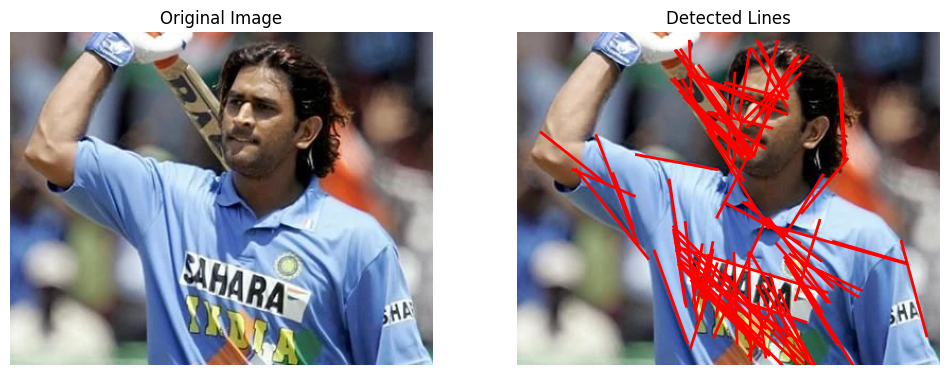

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# Step 1: Upload the image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Step 2: Read the image
src = cv2.imread(image_path)
if src is None:
    raise FileNotFoundError(f"File '{image_path}' does not exist. Please check the file path and try again.")

# Step 3: Convert the image to grayscale
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# Step 4: Perform Canny edge detection
edges = cv2.Canny(src_gray, 50, 200)

# Step 5: Perform Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, 50, minLineLength=50, maxLineGap=10)

# Step 6: Display results
plt.figure(figsize=(12, 6))

# Plot original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Plot image with detected lines
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.title('Detected Lines')
plt.axis('off')

# Plot detected lines
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        plt.plot([x1, x2], [y1, y2], 'r-', linewidth=2)

plt.show()

Saving download (1).jpeg to download (1).jpeg


Button(description='Change Colors', style=ButtonStyle())

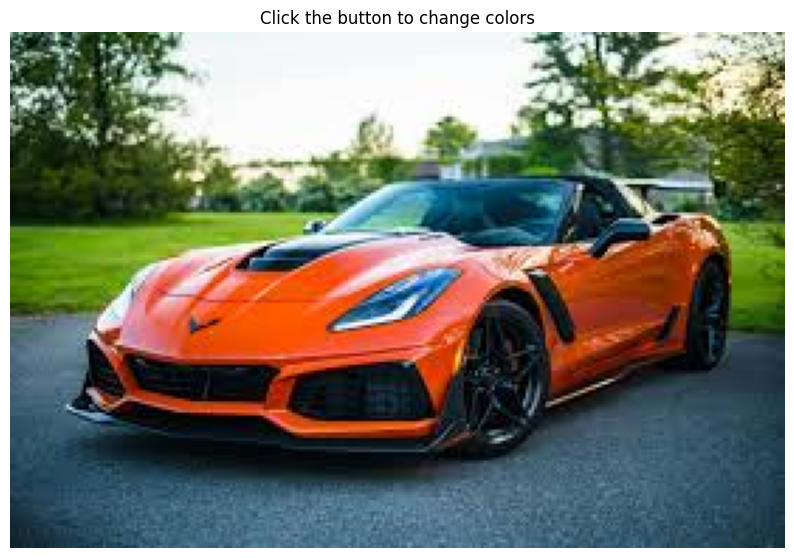

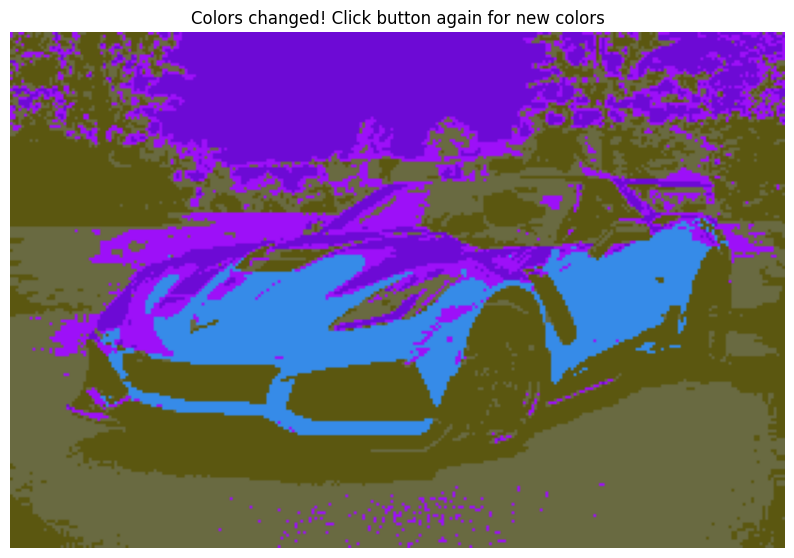

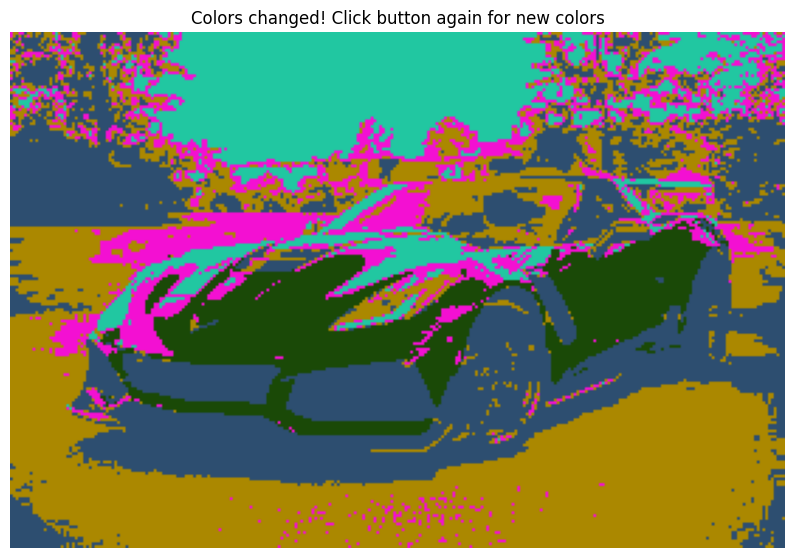

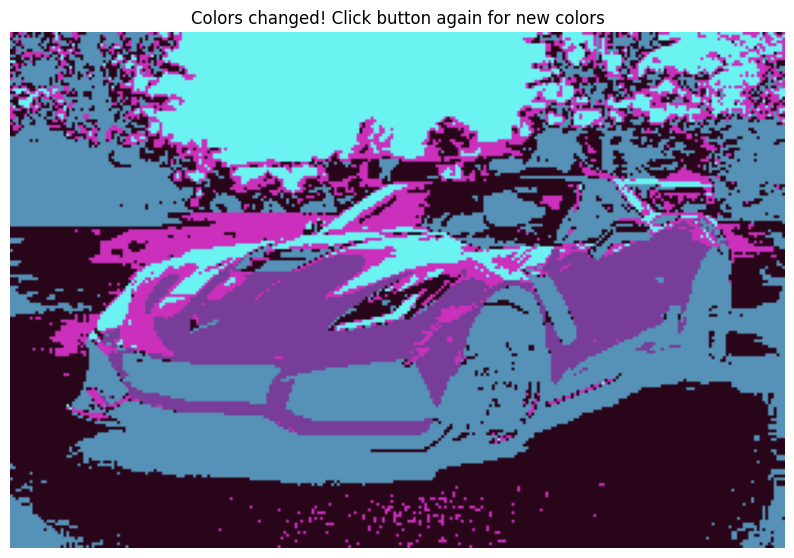

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from google.colab import files
import cv2
import IPython
from IPython.display import display, clear_output
import ipywidgets as widgets

uploaded = files.upload()

# Assuming only one image is uploaded and we access the file name
image_path = next(iter(uploaded))
image = cv2.imread(image_path)

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

rows, cols, channels = image.shape
pixels = image.reshape(rows * cols, channels).astype(float)

num_clusters = 5  # You can change this to any desired number of clusters

kmeans = KMeans(n_clusters=num_clusters, max_iter=200, random_state=42)
cluster_idx = kmeans.fit_predict(pixels)
cluster_centers = kmeans.cluster_centers_

# Function to update the image with new random colors
def update_image():
    random_colors = np.random.randint(0, 255, (num_clusters, 3))

    recolored_pixels = np.zeros_like(pixels)
    for i in range(num_clusters):
        recolored_pixels[cluster_idx == i, :] = random_colors[i, :]

    # Reshape back into image dimensions
    recolored_image = recolored_pixels.reshape(rows, cols, channels).astype(np.uint8)

    # Display the updated image
    plt.figure(figsize=(10, 8))
    plt.imshow(recolored_image)
    plt.title('Colors changed! Click button again for new colors')
    plt.axis('off')
    plt.show()

button = widgets.Button(description="Change Colors")

def on_button_click(b):
    update_image()

button.on_click(on_button_click)

# Display the button
display(button)

plt.figure(figsize=(10, 8))
plt.imshow(image)
plt.title('Click the button to change colors')
plt.axis('off')
plt.show()

Saving download (1).jpeg to download (1) (1).jpeg
Running K-means clustering and PCA without CNN...
Silhouette Score (Without CNN): 0.47


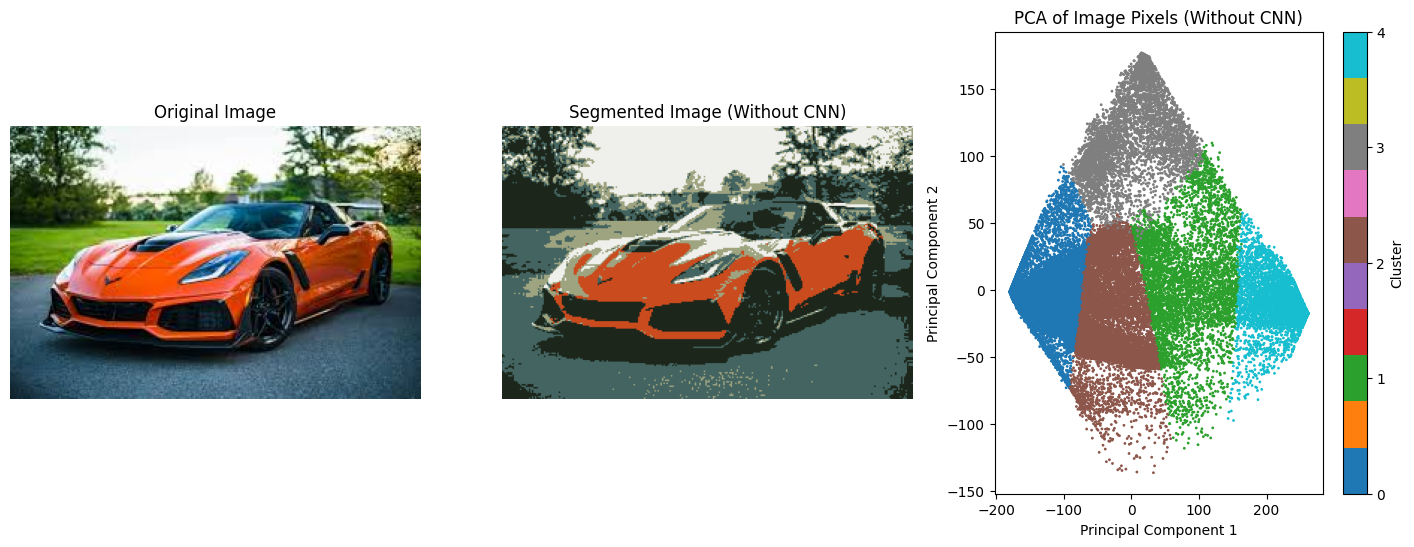

Done - Without CNN

Running K-means clustering and PCA with CNN...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 722ms/step
Silhouette Score (With CNN): 0.57


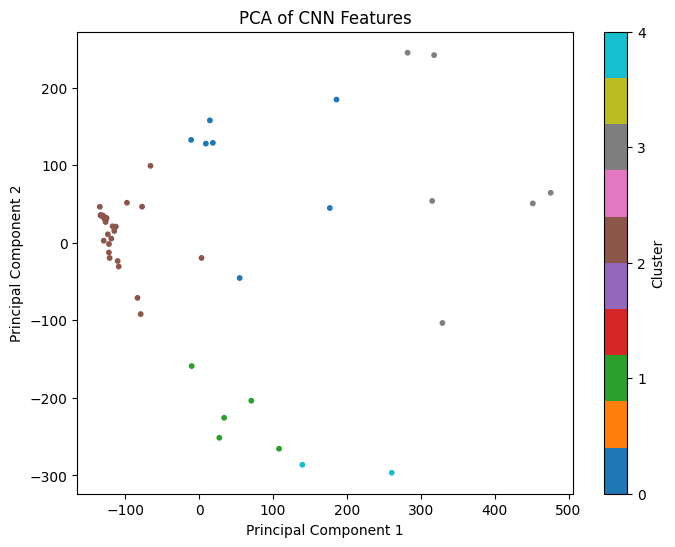

Done - With CNN


In [ ]:
# Import necessary libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from google.colab import files
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image as keras_image

# Upload the image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Function to perform K-means clustering and PCA without CNN
def kmeans_pca_without_cnn(image_path, cluster_n):
    # Load the image
    img = cv.imread(image_path)
    if img is None:
        raise ValueError("Image not found or unable to load.")

    # Convert the image to RGB
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    # Reshape the image to a 2D array of pixels
    pixel_values = img_rgb.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)

    # Perform K-means clustering
    kmeans = KMeans(n_clusters=cluster_n, random_state=42)
    labels = kmeans.fit_predict(pixel_values)

    # Calculate the silhouette score for clustering quality
    silhouette_avg = silhouette_score(pixel_values, labels)
    print(f'Silhouette Score (Without CNN): {silhouette_avg:.2f}')

    # Convert centers to uint8
    centers = np.uint8(kmeans.cluster_centers_)

    # Map the labels to center colors
    segmented_img = centers[labels.flatten()]

    # Reshape segmented image to original dimensions
    segmented_img = segmented_img.reshape(img_rgb.shape)

    # Apply PCA for 2D visualization
    pca = PCA(n_components=2)
    pixel_values_pca = pca.fit_transform(pixel_values)

    # Create a scatter plot for PCA
    plt.figure(figsize=(18, 6))

    # Plot the original and segmented images
    plt.subplot(1, 3, 1)
    plt.imshow(img_rgb)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(segmented_img)
    plt.title('Segmented Image (Without CNN)')
    plt.axis('off')

    # Plot PCA results
    plt.subplot(1, 3, 3)
    scatter = plt.scatter(pixel_values_pca[:, 0], pixel_values_pca[:, 1], c=labels, cmap='tab10', s=1)
    plt.colorbar(scatter, ticks=range(cluster_n), label='Cluster')
    plt.title('PCA of Image Pixels (Without CNN)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    plt.show()
    print('Done - Without CNN')

# Function to perform K-means clustering and PCA using CNN features
def kmeans_pca_with_cnn(image_path, cluster_n):
    # Load the pretrained VGG16 model without the top layer (output layer)
    model = VGG16(weights='imagenet', include_top=False)

    # Load and preprocess the image
    img = keras_image.load_img(image_path, target_size=(224, 224))
    img_array = keras_image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Extract features using the CNN
    features = model.predict(img_array)
    features = features.reshape((-1, features.shape[-1]))  # Reshape the features

    # Apply PCA to reduce the dimensionality of the features
    pca = PCA(n_components=2)
    features_pca = pca.fit_transform(features)

    # Perform K-means clustering on the PCA features
    kmeans = KMeans(n_clusters=cluster_n, random_state=42)
    labels = kmeans.fit_predict(features_pca)

    # Calculate the silhouette score for clustering quality
    silhouette_avg = silhouette_score(features_pca, labels)
    print(f'Silhouette Score (With CNN): {silhouette_avg:.2f}')

    # Create a scatter plot for PCA features
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels, cmap='tab10', s=10)
    plt.colorbar(scatter, ticks=range(cluster_n), label='Cluster')
    plt.title('PCA of CNN Features')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

    print('Done - With CNN')

# Number of clusters
cluster_n = 5

# Run the code for both approaches
print("Running K-means clustering and PCA without CNN...")
kmeans_pca_without_cnn(image_path, cluster_n)

print("\nRunning K-means clustering and PCA with CNN...")
kmeans_pca_with_cnn(image_path, cluster_n)


Saving A-female-works-on-her-Acer-desktop-computer-in-her-bright-office_539x440.jpg to A-female-works-on-her-Acer-desktop-computer-in-her-bright-office_539x440.jpg
Image 'A-female-works-on-her-Acer-desktop-computer-in-her-bright-office_539x440.jpg' uploaded successfully.


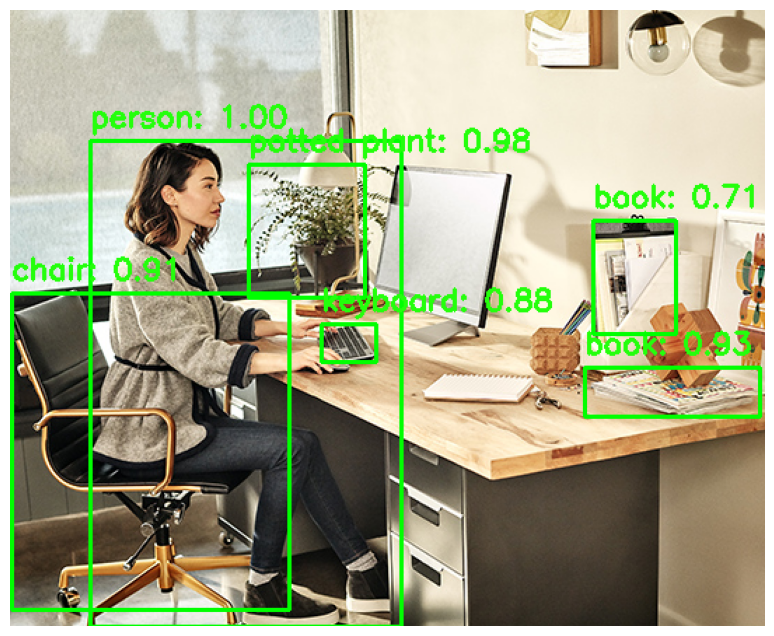


Detected Objects and Confidence Scores:
Object: person, Confidence Score: 1.00
Object: potted plant, Confidence Score: 0.98
Object: book, Confidence Score: 0.93
Object: chair, Confidence Score: 0.91
Object: keyboard, Confidence Score: 0.88
Object: book, Confidence Score: 0.71


In [ ]:
# Step 1: Import necessary libraries R-CNN
import cv2
import numpy as np
import torch
from torchvision import models
import torchvision.transforms as T
import matplotlib.pyplot as plt
from google.colab import files

# Step 2: Upload Image File
uploaded = files.upload()

# Step 3: Get the Uploaded File Name
image_path = list(uploaded.keys())[0]  # Get the name of the uploaded file

# Verify if the image was uploaded successfully
if image_path:
    print(f"Image '{image_path}' uploaded successfully.")
else:
    print("Error: No image was uploaded. Please try again.")

# Step 4: Load the Pre-trained Mask R-CNN Model
model = models.detection.maskrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 5: Define Function to Perform Object Detection and Display Accuracy of Each Object
def detect_objects_with_accuracy(image_path, detection_threshold=0.7):
    # Read the input image
    image = cv2.imread(image_path)

    # Check if the image is loaded properly
    if image is None:
        print("Error: Image not loaded. Check the file path or ensure the file exists.")
        return

    # Convert BGR image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Transform image to match the model's input requirements
    transform = T.Compose([T.ToTensor()])
    image_tensor = transform(image_rgb)

    # Perform object detection
    with torch.no_grad():
        output = model([image_tensor])

    # Get the detected boxes, labels, and scores
    boxes = output[0]['boxes'].cpu().numpy()
    labels = output[0]['labels'].cpu().numpy()
    scores = output[0]['scores'].cpu().numpy()

    # Define labels for COCO dataset
    coco_labels = [
        '_background_', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
        'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
        'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
        'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
        'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork',
        'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
        'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet',
        'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink',
        'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
    ]

    # Variables to store detection metrics for each object
    detected_objects = []

    # Plot the detections on the image
    for i in range(len(boxes)):
        if scores[i] > detection_threshold:
            # Draw the bounding box
            (x1, y1, x2, y2) = boxes[i].astype(int)
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Add label with confidence score
            label = coco_labels[labels[i]]
            confidence = scores[i]
            detected_objects.append((label, confidence))
            label_text = f'{label}: {confidence:.2f}'
            cv2.putText(image_rgb, label_text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (36, 255, 12), 2)

    # Display the image with detected objects
    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

    # Display the accuracy of each detected object
    print("\nDetected Objects and Confidence Scores:")
    for obj in detected_objects:
        print(f"Object: {obj[0]}, Confidence Score: {obj[1]:.2f}")

# Step 6: Run Detection on Your Image and Display Accuracy for Each Object
if image_path:
    detect_objects_with_accuracy(image_path)


Saving A-female-works-on-her-Acer-desktop-computer-in-her-bright-office_539x440.jpg to A-female-works-on-her-Acer-desktop-computer-in-her-bright-office_539x440 (1).jpg
Image 'A-female-works-on-her-Acer-desktop-computer-in-her-bright-office_539x440 (1).jpg' uploaded successfully.


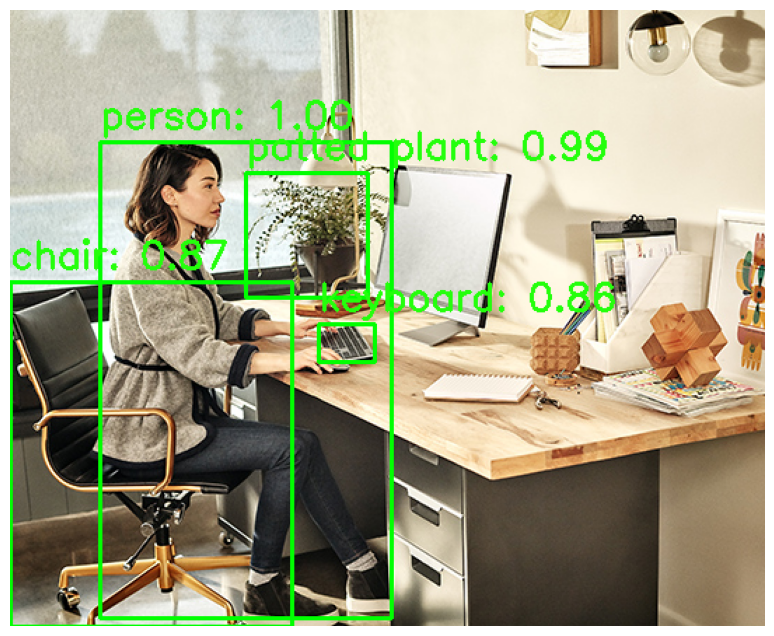

In [4]:
# Step 2: Import Libraries
import cv2
import numpy as np
import torch
from torchvision import models
import torchvision.transforms as T
import matplotlib.pyplot as plt
from google.colab import files

# Step 3: Upload Image File
uploaded = files.upload()

# Step 4: Get the Uploaded File Name
image_path = list(uploaded.keys())[0]  # Get the name of the uploaded file

# Verify if the image was uploaded successfully
if image_path:
    print(f"Image '{image_path}' uploaded successfully.")
else:
    print("Error: No image was uploaded. Please try again.")

# Step 5: Load the Pre-trained Faster R-CNN Model
model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

# Step 6: Define Function to Perform Object Detection
def detect_objects(image_path):
    # Read the input image
    image = cv2.imread(image_path)

    # Check if the image is loaded properly
    if image is None:
        print("Error: Image not loaded. Check the file path or ensure the file exists.")
        return

    # Convert BGR image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    # Transform image to match the model's input requirements
    transform = T.Compose([T.ToTensor()])
    image_tensor = transform(image_rgb)

    # Perform object detection
    with torch.no_grad():
        output = model([image_tensor])

    # Get the detected boxes, labels, and scores
    boxes = output[0]['boxes'].numpy()
    labels = output[0]['labels'].numpy()
    scores = output[0]['scores'].numpy()

    # Define labels for COCO dataset
    coco_labels = [
        'background', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat',
        'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
        'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
        'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
        'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork',
        'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
        'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet',
        'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'shoes', 'microwave', 'oven', 'toaster', 'sink',
        'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
    ]

    # Set detection threshold
    detection_threshold = 0.7

    # Plot the detections on the image
    for i in range(len(boxes)):
        if scores[i] > detection_threshold:
            # Draw the bounding box
            (x1, y1, x2, y2) = boxes[i].astype(int)
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)

            # Add label and accuracy (score)
            label = coco_labels[labels[i]]
            score = scores[i]
            label_with_score = f"{label}: {score:.2f}"
            cv2.putText(image_rgb, label_with_score, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36, 255, 12), 2)

    # Display the image
    plt.figure(figsize=(12, 8))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Step 7: Run Detection on Your Image
if image_path:
    detect_objects(image_path)